In [ ]:
import os
import cv2
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = r"D:\Tai_Lieu\BaiGiang_BaiTap_GiaoTrinh\HK 8 2023-2024\Hoc_Sau_DeepLearning\BaoCaoNhom\CNN\Dataset\train"

In [ ]:
sub_folders = os.listdir(data_dir)
print(f"{len(sub_folders)} sub folders is: {sub_folders}")

list_label_EN = sub_folders.copy()
list_label_VN = ['giận dữ', 'ghê tởm', 'sợ hãi', 'vui vẻ', 'trung lập', 'buồn bã', 'ngạc nhiên']

7 sub folders is: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
images = []
labels = []

In [ ]:
for sub_folder in sub_folders:
    label = sub_folder

    path = os.path.join(data_dir, sub_folder)
    sub_folder_images = os.listdir(path)

    for image_name in sub_folder_images:
        image_path = os.path.join(path, image_name)

        if image_name == "desktop.ini":
            continue
        else:
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(img)

        labels.append(label)

In [ ]:
print(f'{len(images)} images and {len(labels)} labels')

28821 images and 28821 labels


In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
def preprocessing(img):
    img = img / 255.0
    img = cv2.resize(img, (48, 48))
    return img.reshape(-1, 48, 48, 1)

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

In [ ]:
X_train = X_train.reshape(-1, 48, 48, 1)
X_val = X_val.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

In [ ]:
data_gen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    rotation_range=10
)

data_gen.fit(X_train)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(labels)

LabelEncoder()

In [ ]:
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [ ]:
num_classes = len(label_encoder.classes_)

y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

In [ ]:
# Building Model
def build_model():
    model = Sequential()
    # 1st Layer
    model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # 2nd Layer
    model.add(Conv2D(216, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # 3rd layer
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # 4th layer
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

     # Flatten Layer
    model.add(Flatten())

    # Fully connected layer 1
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Fully connected layer 2
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compiling the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                    metrics=['accuracy'])

    return model

In [ ]:
model = build_model()

# Print model summary
print(model.summary())

c:\Users\Lunars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 216)    │       249,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 216)    │           864 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 216)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 216)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       995,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 4,931,647 (18.81 MB)

 Trainable params: 4,927,375 (18.80 MB)

 Non-trainable params: 4,272 (16.69 KB)

None


In [184]:
print(f'total layers: {len(model.layers)}')
print(f'total parameters: {model.count_params()}')
print(f'model input shape: {model.input_shape}')
print(f'model output shape: {model.output_shape}, dtype= {model.outputs[0].dtype}')

total layers: 24
total parameters: 4931647
model input shape: (None, 48, 48, 1)
model output shape: (None, 7), dtype= float32


In [ ]:
checkpoint = ModelCheckpoint("model.keras", monitor="val_acc", verbose=1, save_best_only=True)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

In [ ]:
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    data_gen.flow(X_train, y_train_categorical, batch_size=128),
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    verbose=1
)

Epoch 1/50


c:\Users\Lunars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 483s 3s/step - accuracy: 0.1895 - loss: 2.4254 - val_accuracy: 0.1388 - val_loss: 2.8085
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 459s 3s/step - accuracy: 0.2446 - loss: 1.9328 - val_accuracy: 0.1765 - val_loss: 2.1206
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 471s 3s/step - accuracy: 0.3267 - loss: 1.7337 - val_accuracy: 0.2259 - val_loss: 1.9374
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.3630 - loss: 1.6460 - val_accuracy: 0.3573 - val_loss: 1.6441
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 416s 3s/step - accuracy: 0.4185 - loss: 1.5105 - val_accuracy: 0.3495 - val_loss: 1.6176
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 434s 3s/step - accuracy: 0.4323 - loss: 1.4603 - val_accuracy: 0.4614 - val_loss: 1.4055
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - accuracy: 0.4737 - loss: 1.3738 - val_accuracy: 0.4631 - val_loss: 1.4301
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 434s 3s/step - accuracy: 0.4833 - loss: 1.3384 - val_accuracy: 0.524

In [ ]:
model.save(r"D:\Tai_Lieu\BaiGiang_BaiTap_GiaoTrinh\HK 8 2023-2024\Hoc_Sau_DeepLearning\BaoCaoNhom\CNN\Model\Model_From_VsCode/modelv2.keras")

In [ ]:
model.save(r"D:\Tai_Lieu\BaiGiang_BaiTap_GiaoTrinh\HK 8 2023-2024\Hoc_Sau_DeepLearning\BaoCaoNhom\CNN\Model\Model_From_VsCode\modelv2.h5")

In [ ]:
from tensorflow.keras.models import load_model

call_model = load_model(r"D:\Tai_Lieu\BaiGiang_BaiTap_GiaoTrinh\HK 8 2023-2024\Hoc_Sau_DeepLearning\BaoCaoNhom\CNN\Model\Model_From_VsCode\modelv2.keras")

In [ ]:
print(model.evaluate(X_test, y_test_categorical)[1])

181/181 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.6437 - loss: 1.0416
0.643712043762207


In [185]:
#tạo ds nhãn dự đoán
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

181/181 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step


array([5, 5, 3, ..., 2, 0, 0], dtype=int64)

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (2).

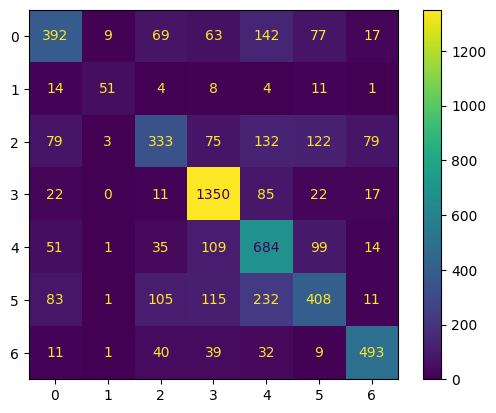

In [195]:
#tạo ds nhãn thực tế 
y_actual = np.argmax(y_test_categorical, axis=1)
y_actual

#tạo confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c_matrix = confusion_matrix(y_actual, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

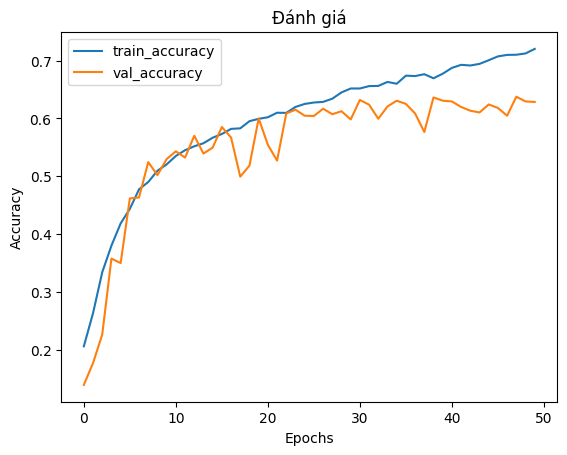

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Đánh giá')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


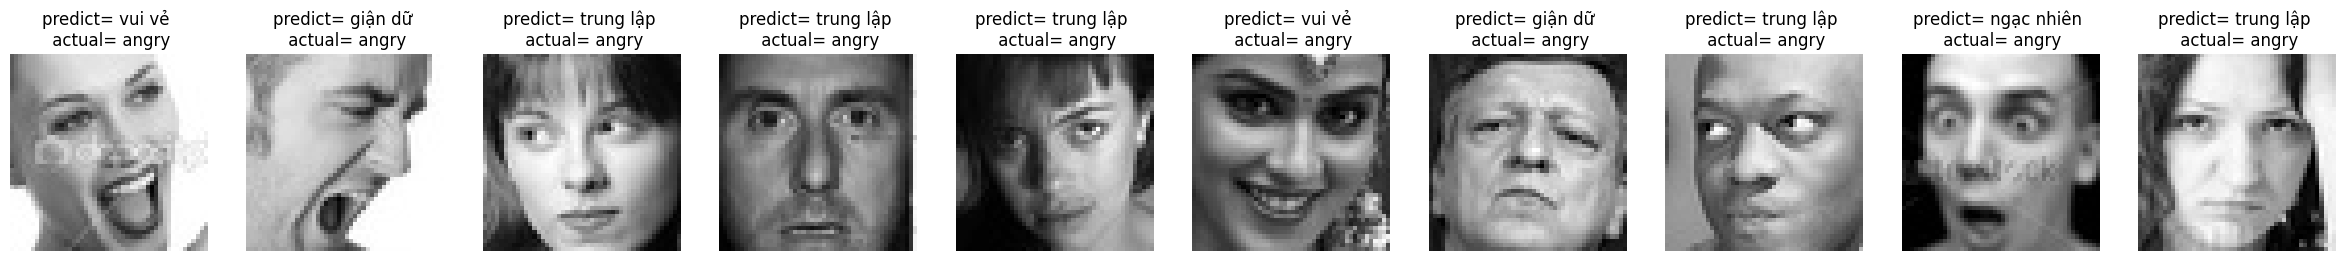

In [193]:
plt.figure(figsize=(30, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[1050+i].reshape(48, 48), cmap='gray')
    kq = model.predict(X_test[1050+i].reshape(-1, 48, 48, 1))    
    plt.title(f'predict= {list_label_VN[np.argmax(kq)]} \n actual= {labels[1050+i]}')
    plt.axis('off')

plt.show()